## Esempio: Crescita Logistica

**Consideriamo di nuovo il modello di crescita logistica**

...Che è definito della ricorsione:

$$
x_{k+1} = r x_k \left( 1 - \frac{x_k}{N} \right)
$$

Dove:

* $x_k$ è la dimensione della popolazione al passo $k$
* $r$ è il tasso di crescita
* $N$ la massima popolazione sostenibile

## Esempio: Crescita Logistica

**Abbiamo già ottenuto un "simulatore" basato su di esso:**

In [1]:
def logi(x0, r, N, n):
    res = [x0]
    x = x0
    for k in range(1, n+1):
        x = r * x * (1 - x / N) # Prossimo valore
        res += [x] # Estensione della lista
    return res

x0, r, N = 0.5, 1.4, 1
n = 4
print(logi(x0, r, N, n))

[0.5, 0.35, 0.31849999999999995, 0.3038808499999999, 0.29615219060458847]


**Proviamo a migliorarlo facendo usi di classi e metodi**

## Esempio: Crescita Logistica

**Iniziamo sostituendo il concatemento con una chiamata ad `append`**

In [2]:
def logi(x0, r, N, n):
    res = [x0]
    x = x0
    for k in range(1, n+1):
        x = r * x * (1 - x / N) # Prossimo valore
        res.append(x) # <-- Uso append per evitare di copiare la lista
    return res

x0, r, N = 0.5, 1.4, 1
n = 4
print(logi(x0, r, N, n))

[0.5, 0.35, 0.31849999999999995, 0.3038808499999999, 0.29615219060458847]


* Il codice è più leggibile ed efficiente (non è necessario copiare la lista)


## Esempio: Crescita Logistica

**Vediamo ora una modifica più consistente**

Tutti i codici di simulazione visti finora hanno una _struttura molto simile_

* A partire da uno stato iniziale
* Si applica una ricorsione
* ...E si restituisce la sequenza degli stati visitati

**In pratica ogni sistema dinamico tempo discreto può essere visto nella forma**

$$
x_{k+1} = f(x_k)
$$

Da modello a modello cambiano solo due cose:

* I parametri utilizzati ed il loro significato
* La _funzione di transizione $f$_

## Esempio: Crescita Logistica

**Il codice di simulazione ha quindi lo pseudo-codice seguente:**

* $X_0 = x_0$
* $\text{for } i = \{1, \ldots n\}$:
  - $X_k = f(X_{k-1})$

**Utilizzando le classi possiamo:**

* Definire lo stato come una classe
* Definire la funzione di transizione come metodo
* Separare il codice di simulazione
* ...Rendendolo completamente riutilizzabile

## Esempio: Crescita Logistica

**Per prima cosa, introduciamo una classe per rappresentare lo stato**

Questa parte dipende dal modello

In [3]:
class LogiState:
    def __init__(self, x, r, N=1):
        self.x = x
        self.r = r
        self.N = N
    
    def nextState(self):
        x, r, N = self.x, self.r, self.N # Rinomino per compattezza
        xnext = r * x * (1 - x / N) # Calcolo il prossimo stato
        return LogiState(xnext, r, N)
    
    def __repr__(self):
        return f'LogiState(x={self.x}, r={self.r}, N={self.N})'

* Una istanza di `LogiState` rappresenta uno stato della popolazione
* Il metodo `nextState` calcola e restituisce il prossimo stato

## Esempio: Crescita Logistica

**Possiamo ora definire il codice di simulazione**

...In modo _indipendente dal modello_:

In [4]:
def simulate(x0, n):
    res = [x0]
    for i in range(1, n+1):
        xnext = res[-1].nextState() # Ottenfo il prossimo stato
        res.append(xnext) # Memorizzo lo stato
    return res

* Gli unici parametri sono ora lo stato iniziale ed il numero di passi
* La transizione di stato viene gestita da `nextState`
* Perché il codice funzioni, la classe usata per rappresentare lo stato
* ...Deve avere un metodo `nextState`

## Esempio: Crescita Logistica

**Vediamo ora come combinare le cose**

In [6]:
x0 = LogiState(x=0.5, r=1.4, N=1)
n = 4

states = simulate(x0, n)
for x in states:
    print(x) # La stringa stampata viene ottenuta con __repr__

LogiState(x=0.5, r=1.4, N=1)
LogiState(x=0.35, r=1.4, N=1)
LogiState(x=0.31849999999999995, r=1.4, N=1)
LogiState(x=0.3038808499999999, r=1.4, N=1)
LogiState(x=0.29615219060458847, r=1.4, N=1)


* Per gestire un nuovo modello basta sostituire `LogiState`
* ...Mentre il codice di `simulate` va bene così com'è

## Esempio: Crescita Logistica

**Per sfruttare al massimo il livello di indipendenza ottenuta**

...Conviene dividere il codice in due moduli

* Nel modulo `example.sim.py` mettiamo [il codice di simulate](http://127.0.0.1:8888/edit/sol/simulate.py)
* Nel modulo `example.logi.py` mettiamo [il codice di LogiState](http://127.0.0.1:8888/edit/sol/logi.py)

**Ora possiamo sfrutta i moduli come segue:**

In [8]:
%load_ext autoreload
%autoreload 2
from example import logi, sim # Si possono importare più moduli con una riga sola

x0 = logi.LogiState(x=0.5, r=1.4, N=1)
states = sim.simulate(x0, n=3)
for x in states:
    print(x) # La stringa stampata viene ottenuta con __repr__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LogiState(x=0.5, r=1.4, N=1)
LogiState(x=0.35, r=1.4, N=1)
LogiState(x=0.31849999999999995, r=1.4, N=1)
LogiState(x=0.3038808499999999, r=1.4, N=1)


## Esempio: Crescita Logistica

**Possiamo separare in modo simile il codice di disegno:**

Nel modulo `example.sim.py` aggiungiamo la funzione:

```python
def plot_sim(x, title=None, figsize=(20, 4)):
    plt.figure(figsize=figsize)
    plt.plot(range(len(x)), x)
    if title is not None:
        plt.title(title)
    plt.show()
```

* Invocandola possimo ottenre il solito grafico con l'andamento della popolazione
* Opzionalmente possiamo specificare titolo e dimensione

## Esempio: Crescita Logistica

**Vediamo il codice completo**

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


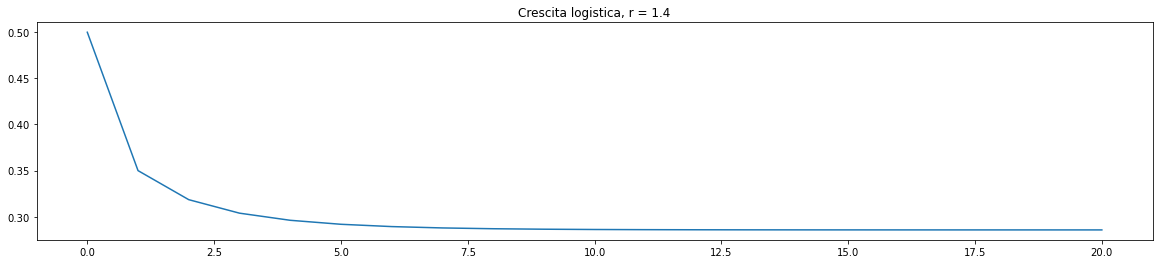

In [10]:
%load_ext autoreload
%autoreload 2
from example import logi, sim # Si possono importare più moduli con una riga sola

r = 1.4
x0 = logi.LogiState(x=0.5, r=r, N=1)
states = sim.simulate(x0, n=20)
X = [state.x for state in states]
sim.plot_sim(X, title=f'Crescita logistica, r = {r}')

## Duck Typing

**Il nostro codice funziona perché Python non fa alcun controllo sui tipi**

```python
def simulate(x0, n):
    res = [x0]
    for i in range(1, n+1):
        xnext = res[-1].nextState() # Ottenfo il prossimo stato
        res.append(xnext) # Memorizzo lo stato
    return res
```

* Nel nostro esempio, il metodo `nextState`
* ...Viene invocato sull'oggetto restituito da `res[-1]`
* Se il metodo esiste, tutto va bene
* Se il metodo non esiste, verrà sollevato un errore

## Duck Typing

**Ogni classe che esibisce `nextState` è trattata come uno stato**

L'espressione tipica in letteratura è:

* Se cammina come un'anatra e starnazza come un'anatra
* ...Allora è un'anatra

Per questa ragione il comportamento è noto come [Duck Typing](https://en.wikipedia.org/wiki/Duck_typing)

**Nel corso ne faremo uso in varie occasioni**